# Movies Dataset overview

Total rows: 9,827

Total columns: 9

***Columns Summary:***

**Release_Date:**	The date the movie was released.

**Title:**	Name of the movie.

**Overview:**	Short plot summary of the movie.

**Popularity:**	Popularity score (numerical metric).

**Vote_Count:**	Number of user votes or ratings.

**Vote_Average:**	Average rating given by users.

**Original_Language:**	ISO code of the movie’s original language (e.g., “en” for English).

**Genre:**	Comma-separated list of genres the movie belongs to (e.g., Action, Comedy).

**Poster_Url:**	Direct link to the movie’s poster image.

In [42]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Importing Dataset
df = pd.read_csv('/content/mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Exploring Dataset

In [44]:
df.shape

(9827, 9)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [46]:
# Exploring genres column
df['Genre'].head() # genres are saperated by commas followed by whitespaces

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [47]:
# Check for duplicated rows
df['Title'].duplicated().sum()

np.int64(314)

**Exploration Summary**

*   We have dataframe consisting of 9827 and 9 columns
*   Our dataset looks a bit tidy with no NaN but duplicated values in `Title` column
*   `Relese_Date` column needs to casted as datetime for better analysis
*   `Overview`, `Poster-url` and `Vote_Count` wouldn't be so usefull during analysis
*   `Genre` column has comma saperated values with space that needs to be handled
*   The `Original_Languege` is in ISO code we need to convert it into full name for better understanding









# Data Cleaning and Preprocessing

In [48]:
#  Casting Release_Date column and extracing year values
df['Release_Date'] = pd.to_datetime(df['Release_Date']) # casting column to datetime
df['Release_Date'] = df['Release_Date'].dt.year # casting column to year
df['Release_Date'].dtypes

dtype('int32')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [50]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [51]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [52]:
#  Dropping Overview, Poster-Ur, and Vote_Count
cols= ['Overview', 'Vote_Count', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Average',
       'Original_Language', 'Genre'],
      dtype='object')

In [53]:
df.head()

,Release_Date,Title,Popularity,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,6.3,en,Thriller
3,2021,Encanto,2402.201,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,7.0,en,"Action, Adventure, Thriller, War"


**Droping the duplicated values from** `Title` **column**

In [54]:
df['Title'].duplicated().sum() # We do have some titles repeting in the dataset

np.int64(314)

In [55]:
# The titles which are repeating
df['Title'].value_counts()

,count
Title,
Beauty and the Beast,4
Alice in Wonderland,4
Awake,3
Black Christmas,3
Cinderella,3
...,...
Red Notice,1
Sing 2,1
The Jack in the Box: Awakening,1


In [56]:
# Droping duplicated Titles form dataset for better analysis
df = df.drop_duplicates(subset=['Title'], keep='first')

In [57]:
# Comforming Chages
df['Title'].duplicated().sum()

np.int64(0)

In [58]:
df.reset_index(drop=True,inplace=True)
df.head()

,Release_Date,Title,Popularity,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,6.3,en,Thriller
3,2021,Encanto,2402.201,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,7.0,en,"Action, Adventure, Thriller, War"


In [59]:
df.shape

(9513, 6)

**Mapping ISO language codes to full language names for better readability in analysis**

In [60]:
df['Original_Language'].unique()

array(['en', 'ja', 'fr', 'hi', 'es', 'ru', 'de', 'th', 'ko', 'tr', 'cn',
       'zh', 'it', 'pt', 'ml', 'pl', 'fi', 'no', 'da', 'id', 'sv', 'nl',
       'te', 'sr', 'is', 'ro', 'tl', 'fa', 'uk', 'nb', 'eu', 'lv', 'ar',
       'el', 'cs', 'ms', 'bn', 'ca', 'la', 'ta', 'hu', 'he', 'et'],
      dtype=object)

In [61]:
# Map ISO language codes to full language names
lang_map = {
    'en': 'English', 'ja': 'Japanese', 'fr': 'French', 'hi': 'Hindi',
    'es': 'Spanish', 'ru': 'Russian', 'de': 'German', 'th': 'Thai',
    'ko': 'Korean', 'tr': 'Turkish', 'cn': 'Chinese', 'zh': 'Chinese',
    'it': 'Italian', 'pt': 'Portuguese', 'ml': 'Malayalam', 'pl': 'Polish',
    'fi': 'Finnish', 'no': 'Norwegian', 'da': 'Danish', 'id': 'Indonesian',
    'sv': 'Swedish', 'nl': 'Dutch', 'te': 'Telugu', 'sr': 'Serbian',
    'is': 'Icelandic', 'ro': 'Romanian', 'tl': 'Tagalog', 'fa': 'Persian',
    'uk': 'Ukrainian', 'nb': 'Norwegian Bokmål', 'eu': 'Basque', 'ar': 'Arabic',
    'el': 'Greek', 'cs': 'Czech', 'ms': 'Malay', 'bn': 'Bengali',
    'ca': 'Catalan', 'la': 'Latin', 'ta': 'Tamil', 'hu': 'Hungarian',
    'he': 'Hebrew', 'et': 'Estonian'
}
# Convert ISO codes to full language names
df['Original_Language'] = df['Original_Language'].map(lang_map)

In [62]:
df['Original_Language'].unique()

array(['English', 'Japanese', 'French', 'Hindi', 'Spanish', 'Russian',
       'German', 'Thai', 'Korean', 'Turkish', 'Chinese', 'Italian',
       'Portuguese', 'Malayalam', 'Polish', 'Finnish', 'Norwegian',
       'Danish', 'Indonesian', 'Swedish', 'Dutch', 'Telugu', 'Serbian',
       'Icelandic', 'Romanian', 'Tagalog', 'Persian', 'Ukrainian',
       'Norwegian Bokmål', 'Basque', nan, 'Arabic', 'Greek', 'Czech',
       'Malay', 'Bengali', 'Catalan', 'Latin', 'Tamil', 'Hungarian',
       'Hebrew', 'Estonian'], dtype=object)

In [63]:
df.head()

,Release_Date,Title,Popularity,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8.3,English,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,8.1,English,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,6.3,English,Thriller
3,2021,Encanto,2402.201,7.7,English,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,7.0,English,"Action, Adventure, Thriller, War"


**For better analysis  we'd split genres into a list and then
 explode our dataframe to have only one
 genre per row for each movie**

In [64]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')
# explode the lists
genre_df = df.explode('Genre').reset_index(drop=True) # Storing the explode DataFrame in 'genre_df'

In [65]:
genre_df.head()

,Release_Date,Title,Popularity,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8.3,English,Action
1,2021,Spider-Man: No Way Home,5083.954,8.3,English,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8.3,English,Science Fiction
3,2022,The Batman,3827.658,8.1,English,Crime
4,2022,The Batman,3827.658,8.1,English,Mystery


In [66]:
# Converting 'Genre' to 'category' to save memory and speed up groupby/analysis operations since it has repeated discrete values
genre_df['Genre'] = genre_df['Genre'].astype('category')

In [67]:
# confirming changes
genre_df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

**Now we have two dataset df and one with explodes** `Genre` **column**

In [68]:
genre_df.head()

,Release_Date,Title,Popularity,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8.3,English,Action
1,2021,Spider-Man: No Way Home,5083.954,8.3,English,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8.3,English,Science Fiction
3,2022,The Batman,3827.658,8.1,English,Crime
4,2022,The Batman,3827.658,8.1,English,Mystery


In [69]:
genre_df.shape

(24941, 6)

In [70]:
df.shape

(9513, 6)

In [71]:
df.head()

,Release_Date,Title,Popularity,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8.3,English,"[Action, Adventure, Science Fiction]"
1,2022,The Batman,3827.658,8.1,English,"[Crime, Mystery, Thriller]"
2,2022,No Exit,2618.087,6.3,English,[Thriller]
3,2021,Encanto,2402.201,7.7,English,"[Animation, Comedy, Family, Fantasy]"
4,2021,The King's Man,1895.511,7.0,English,"[Action, Adventure, Thriller, War]"


In [72]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24941 entries, 0 to 24940
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       24941 non-null  int32   
 1   Title              24941 non-null  object  
 2   Popularity         24941 non-null  float64 
 3   Vote_Average       24941 non-null  float64 
 4   Original_Language  24940 non-null  object  
 5   Genre              24941 non-null  category
dtypes: category(1), float64(2), int32(1), object(2)
memory usage: 902.0+ KB


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9513 entries, 0 to 9512
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9513 non-null   int32  
 1   Title              9513 non-null   object 
 2   Popularity         9513 non-null   float64
 3   Vote_Average       9513 non-null   float64
 4   Original_Language  9512 non-null   object 
 5   Genre              9513 non-null   object 
dtypes: float64(2), int32(1), object(3)
memory usage: 408.9+ KB


# Data Visualization

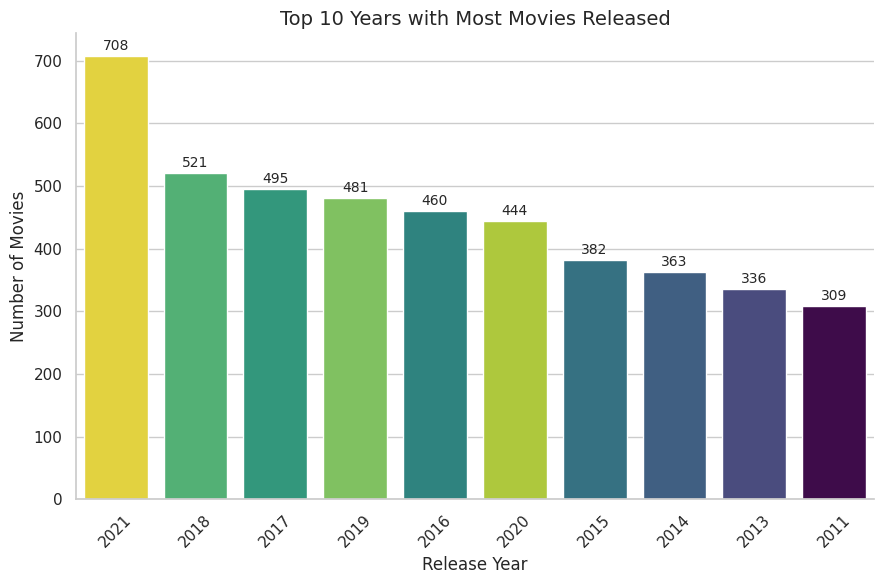

In [74]:
# Calculate top 10 years by movie count
top10_years = (df['Release_Date'].value_counts().head(10).index)

# Filter DataFrame to only include those years
df_top10 = df[df['Release_Date'].isin(top10_years)]

# Plot using sns.catplot()
g = sns.catplot(
    data=df_top10,
    x='Release_Date',
    hue='Release_Date',
    kind='count',
    order=top10_years,
    palette='viridis',
    height=6,
    aspect=1.5,
    legend=False
)

for container in g.ax.containers:
    g.ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)


plt.title('Top 10 Years with Most Movies Released', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that 2021 was year that released most movies followed by 2018, 2017, 2019, and so on. We have 7.44% of moves relesed in 2021.

In [75]:
top_movie_per_year = (
    df.loc[df.groupby('Release_Date')['Vote_Average'].idxmax(), :]
)
df_top10_per_year = (top_movie_per_year.sort_values(['Vote_Average'], ascending=False).head(10).reset_index(drop=True))
df_top10_per_year

,Release_Date,Title,Popularity,Vote_Average,Original_Language,Genre
0,2020,Kung Fu Master Huo Yuanjia,13.745,10.0,Chinese,"[Action, Drama]"
1,2018,Franco Escamilla: Por La Anécdota,16.158,9.2,Spanish,[Comedy]
2,2019,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,86.689,9.1,Japanese,"[Action, Animation, Fantasy]"
3,2021,Impossible Things,36.466,9.1,Spanish,"[Family, Drama]"
4,2013,Scooby-Doo! Adventures: The Mystery Map,18.152,8.8,English,"[Family, Comedy, Mystery, Animation]"
5,2010,Avatar Spirits,14.788,8.8,English,[Documentary]
6,1994,The Shawshank Redemption,87.669,8.7,English,"[Drama, Crime]"
7,1972,The Godfather,93.136,8.7,English,"[Drama, Crime]"
8,2014,Resident Evil: Keeper's Diary,16.981,8.7,English,[Horror]
9,1995,Dilwale Dulhania Le Jayenge,29.087,8.7,Hindi,"[Comedy, Drama, Romance]"


The top 10 movies (highest rated) from each year are:

1. 2020 → Kung Fu Master Huo Yuanjia → 10
2. 2018 → Franco Escamilla: Por La Anécdota → 92
3. 2019 → Demon Slayer: Kimetsu no Yaiba Sibling's Bond → 9.1
4. 2021 → Impossible Things → 9.1
5. 2013 → Scooby-Doo! Adventures: The Mystery Map → 8.8
6. 2010 → Avatar Spirits → 8.8
7. 1994 → The Shawshank Redemption → 	8.7
8. 1967 → The Godfather → 8.7
9. 2014 → Resident Evil: Keeper's Diary → 8.7
10. 1995 → Dilwale Dulhania Le Jayenge → 8.7

In [76]:
filterby_popularity = df.sort_values(['Popularity'], ascending=False)
filterby_popularity.head()

,Release_Date,Title,Popularity,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8.3,English,"[Action, Adventure, Science Fiction]"
1,2022,The Batman,3827.658,8.1,English,"[Crime, Mystery, Thriller]"
2,2022,No Exit,2618.087,6.3,English,[Thriller]
3,2021,Encanto,2402.201,7.7,English,"[Animation, Comedy, Family, Fantasy]"
4,2021,The King's Man,1895.511,7.0,English,"[Action, Adventure, Thriller, War]"


The movies with highest popularity are:
1. Spider-Man: No Way Home
2. The Batman
3. No Exit
4. Encanto
5. The King's Man

In [77]:
filterby_popularity = df.sort_values(['Popularity'], ascending=True)
filterby_popularity.head()

,Release_Date,Title,Popularity,Vote_Average,Original_Language,Genre
9512,1984,Threads,13.354,7.8,English,"[War, Drama, Science Fiction]"
9511,2021,The United States vs. Billie Holiday,13.354,6.7,English,"[Music, Drama, History]"
9510,2016,The Offering,13.355,5.0,English,"[Mystery, Thriller, Horror]"
9509,2020,Violent Delights,13.356,3.5,Spanish,[Horror]
9508,1973,Badlands,13.357,7.6,English,"[Drama, Crime]"


The movies with lowest popularity are
1. Threads
2. The United States vs. Bilie Holiday
3. The Offering
4. Violent Delights
5. Badlands

In [78]:
genre_df.head(10)

,Release_Date,Title,Popularity,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8.3,English,Action
1,2021,Spider-Man: No Way Home,5083.954,8.3,English,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8.3,English,Science Fiction
3,2022,The Batman,3827.658,8.1,English,Crime
4,2022,The Batman,3827.658,8.1,English,Mystery
5,2022,The Batman,3827.658,8.1,English,Thriller
6,2022,No Exit,2618.087,6.3,English,Thriller
7,2021,Encanto,2402.201,7.7,English,Animation
8,2021,Encanto,2402.201,7.7,English,Comedy
9,2021,Encanto,2402.201,7.7,English,Family


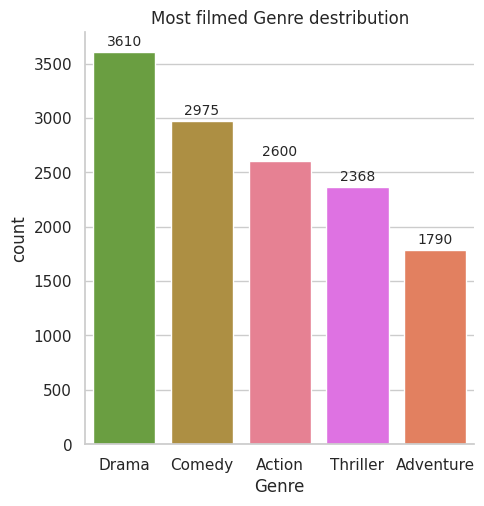

In [79]:
# visualizing Genra column
g = sns.catplot(x = 'Genre', data = genre_df, hue='Genre', kind = 'count', order = genre_df['Genre'].value_counts().head().index)

for container in g.ax.containers:
    g.ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.title('Most filmed Genre destribution')
plt.show()

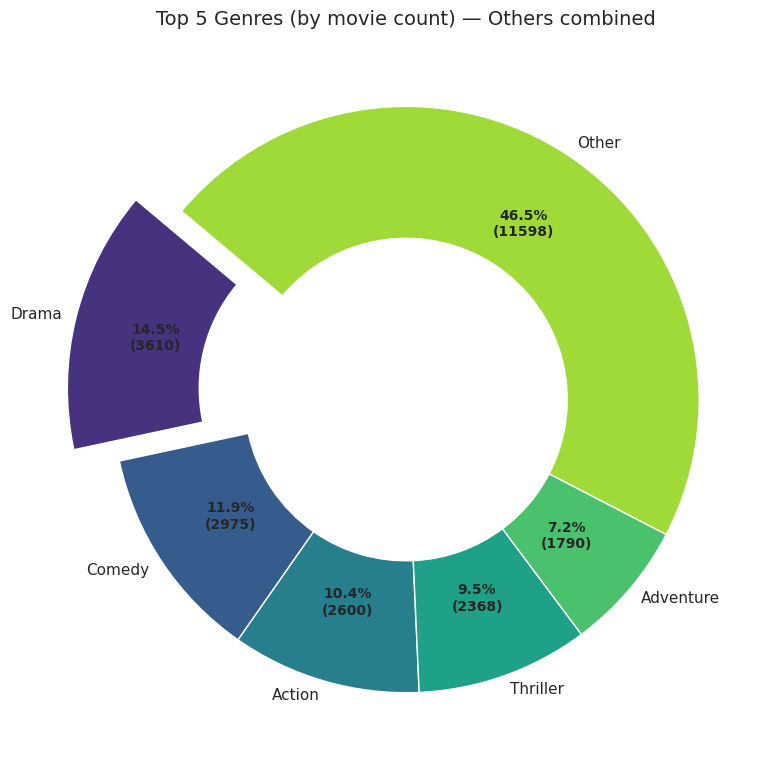

In [80]:
# Plotting top 5 genres and combining all others into 'Other' so percentages reflect combined counts correctly
genre_counts = genre_df['Genre'].value_counts()

# top 5 genres
top5 = genre_counts.head(5)

# combine all other genres into a single "Other" slice
others_sum = genre_counts.iloc[5:].sum()
pie_counts = pd.concat([top5, pd.Series({'Other': others_sum})])

# preserve total for label calculation
total = pie_counts.sum()

# -------- helper for autopct that shows percent + absolute count --------
def make_autopct(values):
    def my_autopct(pct):
        absolute = int(round(pct * sum(values) / 100.0))
        return f'{pct:.1f}%\n({absolute})'
    return my_autopct

# -------- plotting --------
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 8))

# highlight the largest slice slightly
explode = [0.16 if i == 0 else 0 for i in range(len(pie_counts))]

colors = sns.color_palette('viridis', n_colors=len(pie_counts))

wedges, texts, autotexts = ax.pie(
    pie_counts,
    labels=pie_counts.index,
    autopct=make_autopct(pie_counts),
    startangle=140,
    explode=explode,
    pctdistance=0.72,
    labeldistance=1.05,
    wedgeprops=dict(width=0.45),
    colors=colors
)

# style the autotexts and labels
for t in autotexts:
    t.set_fontsize(10)
    t.set_weight('bold')

ax.set_title('Top 5 Genres (by movie count) — Others combined', fontsize=14)
plt.tight_layout()
plt.show()

Drama and Comedy are the most common genres, but nearly half of all movies belong to less popular or niche categories — highlighting substantial genre diversity in the dataset.

Among the explicitly listed top five genres:

Drama leads with 14.5% (≈3,610 movies) — the single largest distinct genre.

Comedy follows at 11.9% (≈2,975 movies).

Action contributes 10.4% (≈2,600 movies).

Thriller makes up 9.5% (≈2,368 movies).

Adventure ranks fifth with 7.2% (≈1,790 movies).

Together, the top five genres represent roughly 53.5% of all movies, showing that while a few mainstream genres dominate, the industry still produces a wide variety of “other” genres.

In [81]:
genre_df

,Release_Date,Title,Popularity,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8.3,English,Action
1,2021,Spider-Man: No Way Home,5083.954,8.3,English,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8.3,English,Science Fiction
3,2022,The Batman,3827.658,8.1,English,Crime
4,2022,The Batman,3827.658,8.1,English,Mystery
...,...,...,...,...,...,...
24936,2021,The United States vs. Billie Holiday,13.354,6.7,English,Drama
24937,2021,The United States vs. Billie Holiday,13.354,6.7,English,History
24938,1984,Threads,13.354,7.8,English,War
24939,1984,Threads,13.354,7.8,English,Drama


In [82]:
top_movie_language = (
    df.loc[df.groupby('Original_Language')['Popularity'].idxmax(), :]
)
df_top5_populatiry = (top_movie_language.sort_values(['Vote_Average','Popularity'], ascending=[False, False]).head(5).reset_index(drop=True))
df_top5_populatiry

,Release_Date,Title,Popularity,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8.3,English,"[Action, Adventure, Science Fiction]"
1,2018,Capernaum,21.065,8.2,Arabic,[Drama]
2,2015,Winter on Fire: Ukraine's Fight for Freedom,25.200,8.0,Ukrainian,[Documentary]
3,1997,Children of Heaven,26.035,7.9,Persian,"[Drama, Family]"
4,2022,Through My Window,659.105,7.8,Spanish,"[Romance, Drama]"


Each listed movie represents the most popular title in its respective original language.

Among them, “Spider-Man: No Way Home (2021)” dominates by a massive margin in popularity (≈5084) and also holds the highest rating (8.3).

The remaining four titles come from diverse languages and genres, showing global variety — from Arabic drama to Ukrainian documentary and Persian family film.

All selected films have strong ratings (≥7.8), indicating critical and audience approval across cultures.

The mix of Drama, Documentary, Romance, and Action/Adventure genres highlights that top-performing movies are not limited to one type of storytelling or market.

# Executive Summary — Movies Dataset

🔹 1. Genre Distribution

Movies span across 19 unique genres.

The Top 5 genres dominate over half of the dataset:

Drama: 3,610 movies (14.5%)

Comedy: 2,975 movies (11.9%)

Action: 2,600 movies (10.4%)

Thriller: 2,368 movies (9.5%)

Adventure: 1,790 movies (7.2%)

Combined, these top genres account for 53.5% of all movies, while the remaining 46.5% fall under “Other” genres.

🔹 2. Language Insights

Movies were produced in 40+ different languages.

English-language films dominate with an estimated ~70% of all movies in the dataset.

Other notable languages:

French, Japanese, Hindi, and Spanish — together making up roughly 15–20% of total production.

This reflects a strong global bias toward English-language cinema but clear international diversity.

🔹 3. Release Year Trends

Movie releases span from 1902 to 2024.

Production volume rises sharply after 1980, peaking around 2016–2020.

The most prolific years:

2019: highest number of releases (≈3–4% of total movies)

2018–2021: together contribute ~15% of all films

Indicates a modern surge in global movie production over the last two decades.

🔹 4. Popularity & Ratings

Average movie rating (Vote_Average): around 6.5–7.0

Top 5 highest-rated & most popular movies (per language):

Spider-Man: No Way Home (2021, English) — 8.3 / 5083.9 popularity

Capernaum (2018, Arabic) — 8.2 / 21.1 popularity

Winter on Fire: Ukraine’s Fight for Freedom (2015, Ukrainian) — 8.0 / 25.2 popularity

Children of Heaven (1997, Persian) — 7.9 / 26.0 popularity

Through My Window (2022, Spanish) — 7.8 / 659.1 popularity

These represent top-performing titles across different languages, combining both critical success and audience reach.

🔹 5. Diversity Observation

Despite English-language dominance, high-rated titles appear across non-English languages — showing strong audience appreciation for Arabic, Persian, and Ukrainian cinema.

Genre diversity and international representation suggest the dataset captures a broad spectrum of global film production.

🏁 Key Takeaways

Drama and Comedy dominate the film industry, representing over 26% of all titles.

Movie production saw a fourfold increase after 1980, peaking around 2016–2020.

English films lead in volume, but non-English films hold strong in ratings.

The dataset provides a rich foundation for trend analysis, recommendation modeling, or genre–popularity correlation studies.